## IMPORTAÇÃO DAS BILBIOTECAS:

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, poisson, binom

## DEFINIÇÃO DE FUNÇÕES:

In [48]:
def separa_por_genero(genero):
    dfx = steam['genres'].str.contains(genero)
    df_saida = pd.DataFrame(dfx)
    df_saida = df_saida.rename(columns = {'genres':genero})
    df_saida = df_saida.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
    df_saida = df_saida.loc[df_saida[genero] == True]
    return df_saida

def loc_price(genres, min_price, max_price):
    dataframe = separa_por_genero(genres)
    dataframe = dataframe.loc[(dataframe['price'] > min_price) & (dataframe['price'] < max_price)]
    return dataframe

def prob_plot(dataframe, serie):
    print('-'*100)
    print("Modelo Exponencial")
    probplot(dataframe[serie], dist="expon", plot=plt);
    plt.show()
    print('-'*100)
    print("Modelo Normal")
    probplot(dataframe[serie], dist="norm", plot=plt);
    plt.show()
    print('-'*100)
    return ' '


In [77]:
gen = input("Gênero a ser explorado:")
dataframe1 = separa_por_genero(genres)

Gênero a ser explorado:Action


In [ ]:
min_price = int(input("Preço mínimo:"))
max_price = int(input("Preço máximo:"))
dataframe2 = loc_price(genres, min_price, max_price)
dataframe2.head()

----------------------------------------------------------------------------------------------------
Modelo Exponencial


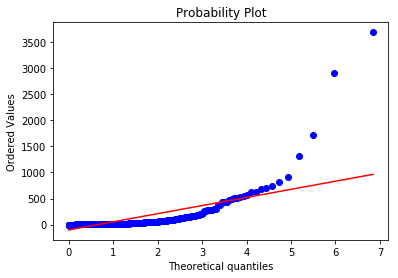

----------------------------------------------------------------------------------------------------
Modelo Normal


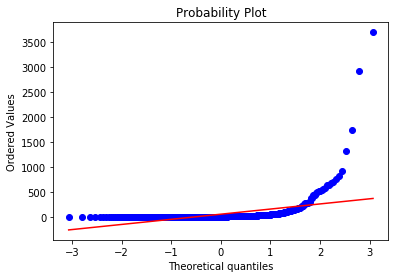

----------------------------------------------------------------------------------------------------


In [81]:
dataframe3 = prob_plot(dataframe2, "negative_ratings")

In [82]:
steam.corr()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
appid,1.000000,-0.116878,-0.087740,0.040510,-0.070888,-0.052198,-0.070236,-0.048308,-0.152112
english,-0.116878,1.000000,0.002860,0.014121,0.006001,0.005705,0.000338,-0.003416,0.007716
required_age,-0.087740,0.002860,1.000000,-0.005459,0.060418,0.057599,0.034423,0.014748,0.120358
achievements,0.040510,0.014121,-0.005459,1.000000,0.006058,0.003578,0.014175,0.009957,-0.007996
positive_ratings,-0.070888,0.006001,0.060418,0.006058,1.000000,0.762804,0.157898,0.035776,0.036110
negative_ratings,-0.052198,0.005705,0.057599,0.003578,0.762804,1.000000,0.161140,0.047887,0.051259
average_playtime,-0.070236,0.000338,0.034423,0.014175,0.157898,0.161140,1.000000,0.914900,0.049242
median_playtime,-0.048308,-0.003416,0.014748,0.009957,0.035776,0.047887,0.914900,1.000000,0.036610
price,-0.152112,0.007716,0.120358,-0.007996,0.036110,0.051259,0.049242,0.036610,1.000000


In [11]:
price = steam["price"]
positive = steam["positive_ratings"]
negative = steam["negative_ratings"]

In [12]:
price = steam["price"]
positive = steam["positive_ratings"]
negative = steam["negative_ratings"]
i = 0
total = 27075
percent_positive = []
percent_negative = []
percent_p = 0
percent_n = 0
while i <= 27074:
    percent_p = positive[i]/(positive[i] + negative[i])
    percent_n = negative[i]/(positive[i] + negative[i])
    percent_positive.append(percent_p)
    percent_negative.append(percent_n)
    i += 1
    
line = range(0, 27074)

df_percent_positive = pd.DataFrame(percent_positive)
df_test = df_percent_positive.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test = df_test.rename(columns = {0:'Percent_Positive'})

df_percent_negative = pd.DataFrame(percent_negative)
df_test2 = df_percent_negative.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test2= df_test2.rename(columns = {0: 'Percent_Negative'})
df_test


In [13]:
line = range(0, 27074)

df_percent_positive = pd.DataFrame(percent_positive)
df_test = df_percent_positive.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test = df_test.rename(columns = {0:'Percent_Positive'})

df_percent_negative = pd.DataFrame(percent_negative)
df_test2 = df_percent_negative.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test2= df_test2.rename(columns = {0: 'Percent_Negative'})
df_test


,Percent_Positive,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,0.973888,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,0.839787,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,0.895648,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,0.826623,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,0.947996,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,0.801278,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,0.961878,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,0.893871,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,0.900990,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,0.965601,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


A correlação entre  é de 0.0764548929036528


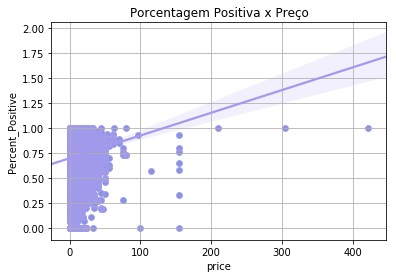

In [14]:
df_test.plot.scatter(x='price',y='Percent_Positive', loglog = False);
sns.regplot(df_test["price"],df_test["Percent_Positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test['price'].corr(df_test['Percent_Positive']))


In [15]:
df_test2 = df_test2.loc[(df_test2['price'] > 16) & (df_test2['price'] < 25)]
df_test2

,Percent_Negative,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
34,0.239130,1600,Dangerous Waters,2006-02-07,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;Simulation;Naval,0,140,44,0,0,50000-100000,22.99
77,0.587413,2870,X Rebirth,2013-11-15,1,Egosoft,Egosoft,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Simulation,Space;Simulation;Sci-fi,69,2832,4032,1744,3386,200000-500000,24.99
78,0.246377,2900,688(I) Hunter/Killer,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;Simulation;Naval,0,52,17,0,0,20000-50000,22.99
79,0.196203,2910,Fleet Command,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player,Strategy,Strategy;Simulation;Naval,0,127,31,0,0,50000-100000,22.99
80,0.297872,2920,Sub Command,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player;Co-op;Includes leve...,Strategy,Strategy;Simulation;Naval,0,33,14,0,0,20000-50000,22.99
203,0.086005,7940,Call of Duty® 4: Modern Warfare®,2007-11-12,1,Infinity Ward;Aspyr (Mac),Activision;Aspyr (Mac),windows;mac,0,Single-player;Multi-player,Action,FPS;Action;Multiplayer,0,8725,821,1417,1503,1000000-2000000,19.99
213,0.102881,8340,Strong Bad's Cool Game for Attractive People: ...,2008-12-18,1,Telltale Games,Telltale Games,windows;mac,0,Single-player,Adventure,Adventure;Point & Click;Comedy,0,218,25,0,0,100000-200000,22.99
219,0.046177,8870,BioShock Infinite,2013-03-25,1,Irrational Games;Aspyr (Mac);Virtual Programmi...,2K;Aspyr (Mac),windows;mac;linux,18,Single-player;Steam Achievements;Full controll...,Action,FPS;Story Rich;Action,80,79442,3846,614,519,2000000-5000000,19.99
222,0.041346,8930,Sid Meier's Civilization® V,2010-09-23,1,Firaxis Games;Aspyr (Mac);Aspyr (Linux),2K;Aspyr (Mac);Aspyr (Linux),windows;mac;linux,0,Single-player;Multi-player;Steam Achievements;...,Strategy,Turn-Based Strategy;Strategy;Turn-Based,286,129030,5565,4760,1797,5000000-10000000,19.99
251,0.070358,10090,Call of Duty: World at War,2008-11-18,1,Treyarch,Activision,windows,16,Single-player;Multi-player;Co-op,Action,Zombies;World War II;FPS,0,19595,1483,2331,1108,1000000-2000000,19.99


A correlação entre  é de 0.008176659562188462


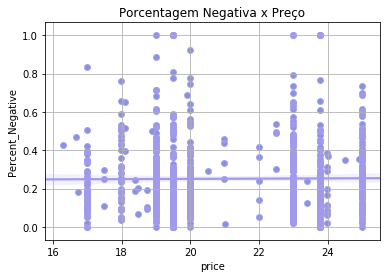

In [16]:
df_test2.plot.scatter(x='price',y='Percent_Negative', loglog = False);
sns.regplot(df_test2["price"],df_test2["Percent_Negative"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test2['price'].corr(df_test2['Percent_Negative']))


A correlação entre  é de -0.14151883016039896


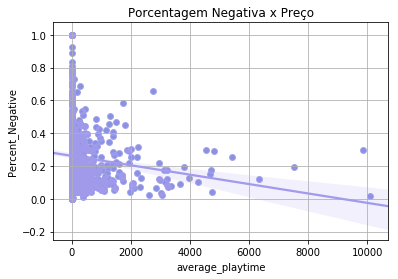

In [17]:
df_test2.plot.scatter(x='average_playtime',y='Percent_Negative', loglog = False);
sns.regplot(df_test2["average_playtime"],df_test2["Percent_Negative"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test2['average_playtime'].corr(df_test2['Percent_Negative']))

A correlação entre  é de 0.020406582386762646


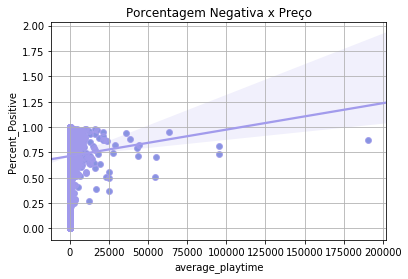

In [18]:
df_test.plot.scatter(x='average_playtime',y='Percent_Positive', loglog = False);
sns.regplot(df_test["average_playtime"],df_test["Percent_Positive"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test['average_playtime'].corr(df_test['Percent_Positive']))


In [19]:
steam


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [20]:
dfx = steam['genres'].str.contains("Indie")
df_saida = pd.DataFrame(dfx)
df_saida = df_saida.rename(columns = {'genres':'Indie'})
df_saida = df_saida.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_saida = df_saida.loc[df_saida['Indie'] == True]
df_saida

,Indie,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
26,True,1002,Rag Doll Kung Fu,2005-10-12,1,Mark Healey,Mark Healey,windows,0,Single-player;Multi-player,Indie,Indie;Fighting;Multiplayer,0,40,17,0,0,20000-50000,5.99
30,True,1500,Darwinia,2005-07-14,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Strategy;Indie;RTS,0,472,158,182,273,500000-1000000,7.19
31,True,1510,Uplink,2006-08-23,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Hacking;Indie;Strategy,0,1602,152,65,77,500000-1000000,6.99
32,True,1520,DEFCON,2006-09-29,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player;Multi-player,Indie;Strategy,Strategy;Indie;Multiplayer,22,2057,344,80,119,500000-1000000,7.19
33,True,1530,Multiwinia,2008-09-19,1,Introversion Software,Introversion Software,windows;mac,0,Single-player;Multi-player;Steam Achievements,Indie,Indie;RTS;Strategy,12,368,75,121,224,500000-1000000,7.19
59,True,2400,The Ship: Murder Party,2006-07-11,1,Outerlight Ltd.,Blazing Griffin Ltd.,windows,0,Single-player;Multi-player;Steam Trading Cards...,Action;Indie;RPG,Multiplayer;Indie;Action,0,4819,792,233,239,1000000-2000000,0.00
62,True,2520,Gumboy - Crazy Adventures™,2006-12-19,1,"CINEMAX, s.r.o.","CINEMAX, s.r.o.",windows,0,Single-player,Casual;Indie,Casual;Indie;Singleplayer,0,52,46,0,0,50000-100000,0.00
70,True,2720,ThreadSpace: Hyperbol,2007-07-12,1,Iocaine Studios,Atari,windows,0,Single-player;Multi-player;Includes level editor,Action;Indie;Strategy,Strategy;Action;Indie,0,31,9,0,0,20000-50000,3.99
121,True,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99
122,True,4100,Poker Superstars II,2006-10-05,1,Funkitron,Funkitron,windows,0,Single-player,Casual;Strategy;Indie,Card Game,0,4,5,0,0,0-20000,5.99


In [21]:
def separa_por_genero(genero):
    dfx = steam['genres'].str.contains(genero)
    df_saida = pd.DataFrame(dfx)
    df_saida = df_saida.rename(columns = {'genres':genero})
    df_saida = df_saida.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
    df_saida = df_saida.loc[df_saida[genero] == True]
    return df_saida

In [22]:
steam['genres'].str.contains("Action").value_counts()

False    15172
True     11903
Name: genres, dtype: int64

In [23]:
Action = steam['genres'].str.contains("Action")
Action.head()

0    True
1    True
2    True
3    True
4    True
Name: genres, dtype: bool

In [24]:
df_test4 = pd.DataFrame(Action)
df_test4.head()

,genres
0,True
1,True
2,True
3,True
4,True


In [25]:
df_test4 = pd.DataFrame(Action)
df_test4 = df_test4.rename(columns = {'genres':'Action'})
df_test4 = df_test4.join(df_test, how='inner', lsuffix=' ', rsuffix=' ')
df_test4
df_test5 = df_test4.loc[df_test4['Action'] == True]
df_test5

,Action,Percent_Positive,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,True,0.973888,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,True,0.839787,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,True,0.895648,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,True,0.826623,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,True,0.947996,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,True,0.801278,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,True,0.961878,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,True,0.893871,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,True,0.900990,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,True,0.965601,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [26]:
action_10 = df_test4.loc[(df_test4['price'] < 10) & (df_test4['price'] > 4)]
action_30 = df_test4.loc[(df_test4['price'] < 30) & (df_test4['price'] > 10)]
action_40 = df_test4.loc[(df_test4['price'] < 5) & (df_test4['price'] > 0)]
action_100 = df_test4.loc[(df_test4['price'] > 100)]

In [27]:
action_40

,Action,Percent_Positive,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1,True,0.839787,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,True,0.895648,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,True,0.826623,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,True,0.947996,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,True,0.801278,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
8,True,0.900990,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
13,True,0.884384,320,Half-Life 2: Deathmatch,2004-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled;Includes...,Action,Action;FPS;Multiplayer,0,6020,787,311,32,10000000-20000000,3.99
27,True,0.875070,1200,Red Orchestra: Ostfront 41-45,2006-03-14,1,Tripwire Interactive,Tripwire Interactive,windows;mac;linux,0,Multi-player;Steam Achievements;Valve Anti-Che...,Action,World War II;Action;FPS,44,1562,223,232,258,500000-1000000,3.99
36,False,0.806798,1630,Disciples II: Rise of the Elves,2006-07-06,1,Strategy First,Strategy First,windows,0,Single-player;Multi-player;Co-op,Strategy,Strategy;Turn-Based Strategy;Fantasy,0,451,108,0,0,100000-200000,4.99
37,False,0.763240,1640,Disciples II: Gallean's Return,2006-07-06,1,Strategy First,Strategy First,windows,0,Single-player;Multi-player;Co-op,Strategy,Turn-Based Strategy;Strategy;Classic,0,490,152,9,12,100000-200000,4.99


A correlação entre  é de 0.0813119361590231


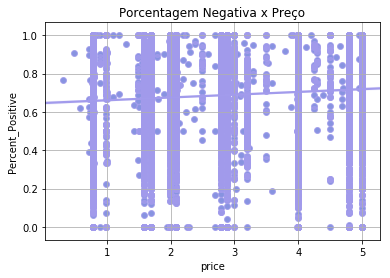

In [28]:
action_40.plot.scatter(x='price',y='Percent_Positive', loglog = False);
sns.regplot(action_40["price"],action_40["Percent_Positive"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', action_40['price'].corr(action_40['Percent_Positive']))


In [40]:
indie = separa_por_genero("Indie")
def loc_price(genres, min_price, max_price):
    dataframe = separa_por_genero(genres)
    dataframe = dataframe.loc[(dataframe['price'] > min_price) & (dataframe['price'] < max_price)]
    return dataframe
    

In [32]:
indie

,Indie,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
26,True,1002,Rag Doll Kung Fu,2005-10-12,1,Mark Healey,Mark Healey,windows,0,Single-player;Multi-player,Indie,Indie;Fighting;Multiplayer,0,40,17,0,0,20000-50000,5.99
30,True,1500,Darwinia,2005-07-14,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Strategy;Indie;RTS,0,472,158,182,273,500000-1000000,7.19
31,True,1510,Uplink,2006-08-23,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Hacking;Indie;Strategy,0,1602,152,65,77,500000-1000000,6.99
32,True,1520,DEFCON,2006-09-29,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player;Multi-player,Indie;Strategy,Strategy;Indie;Multiplayer,22,2057,344,80,119,500000-1000000,7.19
33,True,1530,Multiwinia,2008-09-19,1,Introversion Software,Introversion Software,windows;mac,0,Single-player;Multi-player;Steam Achievements,Indie,Indie;RTS;Strategy,12,368,75,121,224,500000-1000000,7.19
59,True,2400,The Ship: Murder Party,2006-07-11,1,Outerlight Ltd.,Blazing Griffin Ltd.,windows,0,Single-player;Multi-player;Steam Trading Cards...,Action;Indie;RPG,Multiplayer;Indie;Action,0,4819,792,233,239,1000000-2000000,0.00
62,True,2520,Gumboy - Crazy Adventures™,2006-12-19,1,"CINEMAX, s.r.o.","CINEMAX, s.r.o.",windows,0,Single-player,Casual;Indie,Casual;Indie;Singleplayer,0,52,46,0,0,50000-100000,0.00
70,True,2720,ThreadSpace: Hyperbol,2007-07-12,1,Iocaine Studios,Atari,windows,0,Single-player;Multi-player;Includes level editor,Action;Indie;Strategy,Strategy;Action;Indie,0,31,9,0,0,20000-50000,3.99
121,True,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99
122,True,4100,Poker Superstars II,2006-10-05,1,Funkitron,Funkitron,windows,0,Single-player,Casual;Strategy;Indie,Card Game,0,4,5,0,0,0-20000,5.99


In [42]:
loc_price("Indie", 7, 10).corr()

,Indie,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
Indie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appid,NaN,1.000000,-0.098197,-0.045249,0.023383,-0.215846,-0.246179,-0.070105,-0.068215,-0.261039
english,NaN,-0.098197,1.000000,0.015060,0.013210,-0.008105,-0.001473,0.007427,0.009544,0.028240
required_age,NaN,-0.045249,0.015060,1.000000,-0.011543,0.047531,0.062365,0.003134,-0.000966,-0.004654
achievements,NaN,0.023383,0.013210,-0.011543,1.000000,-0.009273,-0.010637,0.236878,0.223063,0.152924
positive_ratings,NaN,-0.215846,-0.008105,0.047531,-0.009273,1.000000,0.737386,0.107562,0.086899,0.102690
negative_ratings,NaN,-0.246179,-0.001473,0.062365,-0.010637,0.737386,1.000000,0.167906,0.175440,0.087114
average_playtime,NaN,-0.070105,0.007427,0.003134,0.236878,0.107562,0.167906,1.000000,0.981477,0.074607
median_playtime,NaN,-0.068215,0.009544,-0.000966,0.223063,0.086899,0.175440,0.981477,1.000000,0.076414
price,NaN,-0.261039,0.028240,-0.004654,0.152924,0.102690,0.087114,0.074607,0.076414,1.000000


In [38]:
indie_10.corr()

,Indie,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
Indie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appid,NaN,1.000000,-0.098197,-0.045249,0.023383,-0.215846,-0.246179,-0.070105,-0.068215,-0.261039
english,NaN,-0.098197,1.000000,0.015060,0.013210,-0.008105,-0.001473,0.007427,0.009544,0.028240
required_age,NaN,-0.045249,0.015060,1.000000,-0.011543,0.047531,0.062365,0.003134,-0.000966,-0.004654
achievements,NaN,0.023383,0.013210,-0.011543,1.000000,-0.009273,-0.010637,0.236878,0.223063,0.152924
positive_ratings,NaN,-0.215846,-0.008105,0.047531,-0.009273,1.000000,0.737386,0.107562,0.086899,0.102690
negative_ratings,NaN,-0.246179,-0.001473,0.062365,-0.010637,0.737386,1.000000,0.167906,0.175440,0.087114
average_playtime,NaN,-0.070105,0.007427,0.003134,0.236878,0.107562,0.167906,1.000000,0.981477,0.074607
median_playtime,NaN,-0.068215,0.009544,-0.000966,0.223063,0.086899,0.175440,0.981477,1.000000,0.076414
price,NaN,-0.261039,0.028240,-0.004654,0.152924,0.102690,0.087114,0.074607,0.076414,1.000000


In [39]:
indie_10

,Indie,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
30,True,1500,Darwinia,2005-07-14,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player,Indie;Strategy,Strategy;Indie;RTS,0,472,158,182,273,500000-1000000,7.19
32,True,1520,DEFCON,2006-09-29,1,Introversion Software,Introversion Software,windows;mac;linux,0,Single-player;Multi-player,Indie;Strategy,Strategy;Indie;Multiplayer,22,2057,344,80,119,500000-1000000,7.19
33,True,1530,Multiwinia,2008-09-19,1,Introversion Software,Introversion Software,windows;mac,0,Single-player;Multi-player;Steam Achievements,Indie,Indie;RTS;Strategy,12,368,75,121,224,500000-1000000,7.19
155,True,6120,Shank,2010-10-25,1,Klei Entertainment,Klei Entertainment,windows;mac;linux,0,Single-player;Shared/Split Screen;Steam Achiev...,Action;Indie,Action;Indie;Beat 'em up,12,1749,227,255,363,200000-500000,7.19
417,True,18040,DeathSpank,2010-10-25,1,Hothead Games,Electronic Arts,windows;mac,0,Single-player;Shared/Split Screen;Steam Achiev...,Action;Indie;RPG,RPG;Action;Indie,12,540,34,1008,1008,100000-200000,7.99
418,True,18050,DeathSpank: Thongs of Virtue,2010-11-30,1,Hothead Games,Electronic Arts,windows;mac,0,Single-player;Shared/Split Screen;Steam Achiev...,Action;RPG;Indie,Action;RPG;Indie,13,125,18,0,0,50000-100000,7.99
470,True,22100,Mount & Blade,2008-11-03,1,TaleWorlds Entertainment,TaleWorlds Entertainment,windows,0,Single-player;Steam Trading Cards;Includes lev...,Indie;RPG,RPG;Medieval;Open World,0,3205,291,415,597,1000000-2000000,7.99
537,True,26000,The Maw,2009-03-09,1,Twisted Pixel Games,Twisted Pixel Games,windows,0,Single-player;Steam Achievements,Action;Indie,Indie;Platformer;Cute,15,161,36,14,14,50000-100000,8.99
622,True,33180,Zombie Shooter 2,2009-11-18,1,Sigma Team Inc.,Sigma Team Inc.,windows,0,Single-player,Action;Indie;RPG,Action;Zombies;RPG,0,291,85,247,247,100000-200000,7.19
625,True,33390,Zeit²,2011-01-12,1,Brightside Games,Ubisoft,windows,0,Single-player;Steam Achievements;Partial Contr...,Action;Indie,Action;Indie;Shoot 'Em Up,70,26,7,0,0,0-20000,8.59


----------------------------------------------------------------------------------------------------
Modelo Exponencial


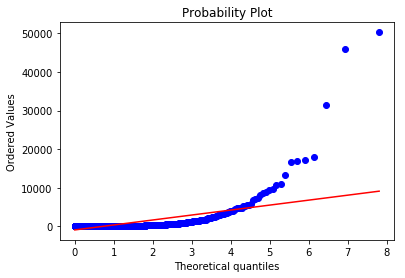

----------------------------------------------------------------------------------------------------
Modelo Normal


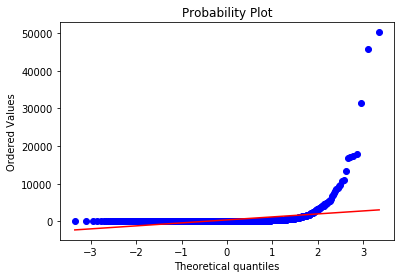

----------------------------------------------------------------------------------------------------


' '

In [49]:
prob_plot(indie_10, 'positive_ratings')

In [51]:
genres = input("Gênero a ser explorado:")


Qual seu nome?eiki
Olá eiki, tudo bem?
